# 데이터셋 출처
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95
- 이번 실습에서는 다양한 알고리즘을 사용하여 모델의 성능을 올려볼 예정이다.
- 이전 실습에서는 결정 트리 학습법을 사용해보았는데, 결정 트리 학습법은 지도 분류 학습에 가장 유용하게 사용되고 있는 기법 중 하나이다.
- 결정 트리에는 gini 계수가 있다. 이 계수가 0이 되면 그 후로 더 뻗어나가지 않는다 = 불순물이 섞여 있지 않은 순수한 상태


- 데이터 마이닝에서 사용되는 결정 트리 분석법 (2종류)
    - 1) 분류 트리 분석
        - 예측된 결과로 입력 데이터가 분류되는 클래스를 출력 (당뇨병 발병 여부 등)
    - 2) 회귀 트리 분석
        - 예측된 결과로 특정 의미를 지니는 실수 값을 출력 (주택의 가격, 환자의 입원 기간 등의 연속된 수치)   
- 회귀 트리와 분류 트리는 일정 부분 유사하지만, 입력 자료를 나누는 과정 등에서 차이점이 있다.


- 트리를 앙상블 기법에 사용할 수도 있다.
- 앙상블 기법: 여러 기법을 섞어서 사용하는 기법
- Random Forest: 샘플링하여 여러 데이터를 만들며, 이를 통해 오버피팅을 방지할 수 있다. 이러한 샘플을 부트스트랩이라고 한다.


- 초기 앙상블 방법인 배깅(Bootstrap aggregating)결정 트리는 반복적으로 교체 과정을 수행하는 것과 함께 훈련 데이터를 재샘플링하고, 합의 예측을 위한 트리를 선택하는 것으로 다수의 의사 결정 트리를 생성한다 > 샘플 데이터를 여러 개 추출하여 다수의 의사 결정 트리를 생성한다. 결정 트리는 밑으로 갈수록 오버피팅 현상이 나타날 수 있는데 이 배깅 기법은 오버피팅 현상을 줄여줄 수 있다.


- 랜덤 포레스트 분류기에서는 분류 속도를 향상시키기 위해서 결정 트리들을 사용한다.
- 부스트 트리는 회귀 분석과 분류 문제에 사용될 수 있다.
- 회전 포레스트는 모든 결정 트리가 먼저 입력 트리 중 임의의 부분 집합에 대한 주성분 분석(PCA)을 적용하여 훈련된다.

# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터 불러오기

In [2]:
# 전처리한 데이터
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df["Outcome"]
y.shape

(768,)

In [7]:
# 학습 데이터와 테스트 데이터셋 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 9), (154, 9), (614,), (154,))

# 머신러닝 알고리즘 사용하기
## single tree
- 하나의 트리 사용

In [9]:
from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
# model

DecisionTreeClassifier(random_state=42)

## Bagging
- 랜덤하게 트리를 여러 개 그린다.

In [20]:
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)
# model

RandomForestClassifier(random_state=42)

## Boosting
- 샘플링을 할 때 트리에 가중치를 부여한다.

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42, max_depth=6)
model

# max_depth=3 기본값

GradientBoostingClassifier(max_depth=6, random_state=42)

# 학습과 예측하기

In [84]:
# 학습시키기
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, random_state=42)

In [85]:
# feature 간의 중요도 확인
model.feature_importances_

array([1.10486139e-01, 3.97444597e-02, 8.07296321e-02, 4.35800427e-02,
       3.24323451e-02, 1.08827577e-01, 5.44244728e-03, 5.78240412e-01,
       5.16945750e-04])

In [86]:
feature_names = X_train.columns.tolist()

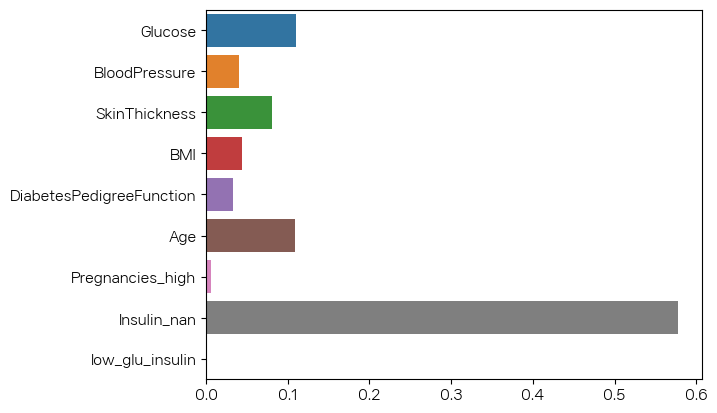

In [87]:
# feature의 중요도 시각화
# 대부분의 트리 알고리즘에서는 feature_importance를 알 수 있다.
# RandomForestClassifier로 시각화해본 결과, 인슐린이 가장 중요한 역할을 하는 것을 볼 수 있다.
# GradientBoostingClassifier로 시각화해본 결과, 글루코스의 양은 줄어들고 인슐린의 양이 늘어났다.

sns.barplot(x=model.feature_importances_, y=feature_names);

In [88]:
# 예측하기
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 0], dtype=int64)

# 정확도 측정하기

In [89]:
# 다르게 예측한 개수 구하기
# 1. DecisionTree: 28
# 2. RandomForest: 20
# 3. Gradient: 20
(y_predict != y_test).sum()

20

In [90]:
# accuracy score 구하기
# 1. DecisionTree: 0.818
# 2. RandomForest: 0.870
# 3. Gradient: 0.870
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)  

0.8701298701298701

- 같은 조건에서 같은 피처를 가졌을 때, 보통 결정트리보다 랜덤포레스트의 성능이 좋은 편이다.
- 그런데 이번 실습에서 랜덤 포레스트보다 결정트리를 먼저 다루어본 이유는?
    - 결정트리는 트리가 1개이지만, 랜덤포레스트는 트리가 많다.(n_estimators의 기본값이 100)
    - 따라서 결정트리는 시각화하기가 간편한 반면에, 랜덤포레스트는 시각화하기가 어려움
- 그라디언트부스팅은 max_depth=3이 기본값인데 10으로 변경해보았더니 오히려 성능이 떨어졌다. 그래서 6으로 변경해보았더니 랜덤포레스트와 거의 비슷한 성능으로 나옴! yeah~